In [1]:
from env import host, username, password
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from datetime import date
import nick_wrangle as get

In [2]:
train, validate, test = get.wrangle_superstore()

Using cached CSV
Using cached CSV
Dataframe Input received: Splitting Data .5/.3/.2.
Train: (867, 23), Validate (520, 23), and Test (347, 23) are ready.    
 Proceed with EDA.


In [3]:
train

,month,year,region_name,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,...,product_name,category,sub_category,days_bw_shipment,quantity,discount,profit,profit_per_product,sales,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,January,2014,Central,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,...,Avery 508,Office Supplies,Labels,4 days,3.0,0.2,4.2717,1.4239,11.784,3.928
2014-01-04,January,2014,Central,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,...,SAFCO Boltless Steel Shelving,Office Supplies,Storage,4 days,3.0,0.2,-64.7748,-21.5916,272.736,90.912
2014-01-04,January,2014,Central,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,...,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,4 days,2.0,0.8,-5.4870,-2.7435,3.540,1.770
2014-01-09,January,2014,Central,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,...,Memorex Micro Travel Drive 8 GB,Technology,Accessories,4 days,3.0,0.2,9.7500,3.2500,31.200,10.400
2014-01-09,January,2014,Central,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,...,Newell 312,Office Supplies,Art,4 days,2.0,0.2,1.1680,0.5840,9.344,4.672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-23,May,2016,West,FUR-FU-10003691,LD-17005,CA-2016-142762,2016-05-27,Standard Class,Consumer,San Francisco,...,"Eldon Image Series Desk Accessories, Ebony",Furniture,Furnishings,4 days,3.0,0.0,16.3020,5.4340,37.050,12.350
2016-05-23,May,2016,South,OFF-PA-10001526,AP-10720,CA-2016-154403,2016-05-27,Standard Class,Home Office,Florence,...,Xerox 1949,Office Supplies,Paper,4 days,1.0,0.0,2.4402,2.4402,4.980,4.980
2016-05-26,May,2016,East,OFF-PA-10004675,TB-21280,CA-2016-157266,2016-06-01,Standard Class,Consumer,Washington,...,"Telephone Message Books with Fax/Mobile Section, 5 1/2"" x 3 3/16""",Office Supplies,Paper,6 days,2.0,0.0,5.8420,2.9210,12.700,6.350


In [4]:
# Checking for time gaps in the data:
print('Time gaps for Train:')
print('Number of rows:', train.index.nunique())
n_days = train.index.max() - train.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

print('')
print('Time gaps for Validate:')
print('Number of rows:', validate.index.nunique())
n_days = validate.index.max() - validate.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

print('')
print('Time gaps for Test:')
print('Number of rows:', test.index.nunique())
n_days = test.index.max() - test.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

Time gaps for Train:
Number of rows: 310
Number of days between first and last day: 874 days 00:00:00

Time gaps for Validate:
Number of rows: 159
Number of days between first and last day: 387 days 00:00:00

Time gaps for Test:
Number of rows: 103
Number of days between first and last day: 198 days 00:00:00


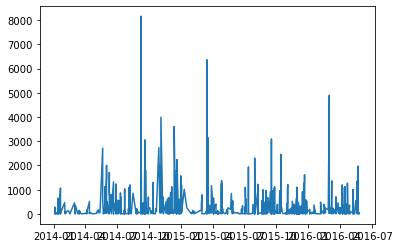

In [5]:
plt.plot(train.index, train.sales)

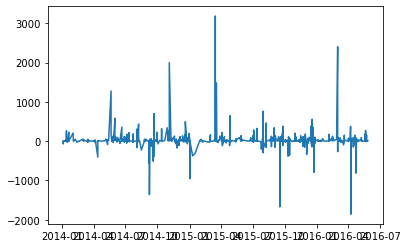

In [6]:
plt.plot(train.index, train.profit)

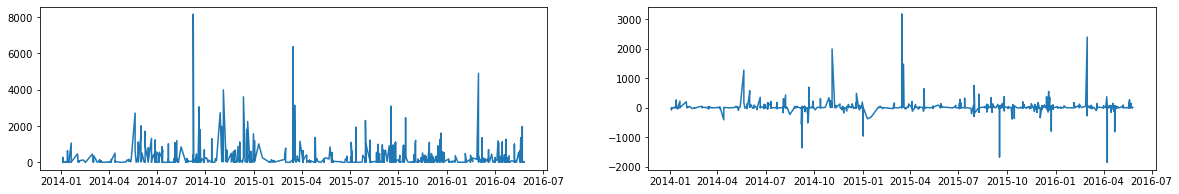

In [19]:
plt.subplot(1, 2, 1)
plt.plot(train.index, train.sales)
plt.subplot(1, 2, 2)
plt.plot(train.index, train.profit)

<AxesSubplot:ylabel='Frequency'>

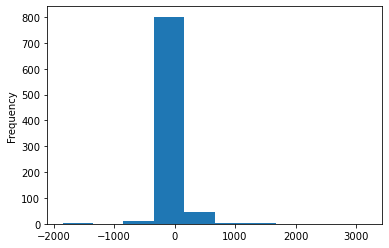

In [7]:
y = train.profit
y.plot.hist()

[Text(0.5, 1.0, 'Average Profit by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Gains or Losses')]

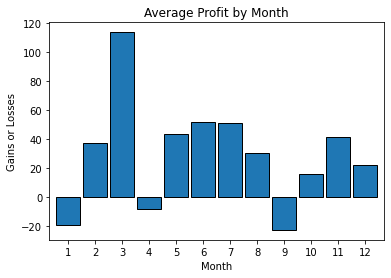

In [8]:
# kind of reminds me of the way log-error was distributed in the zillow data set
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Month', xlabel='Month', ylabel='Gains or Losses')

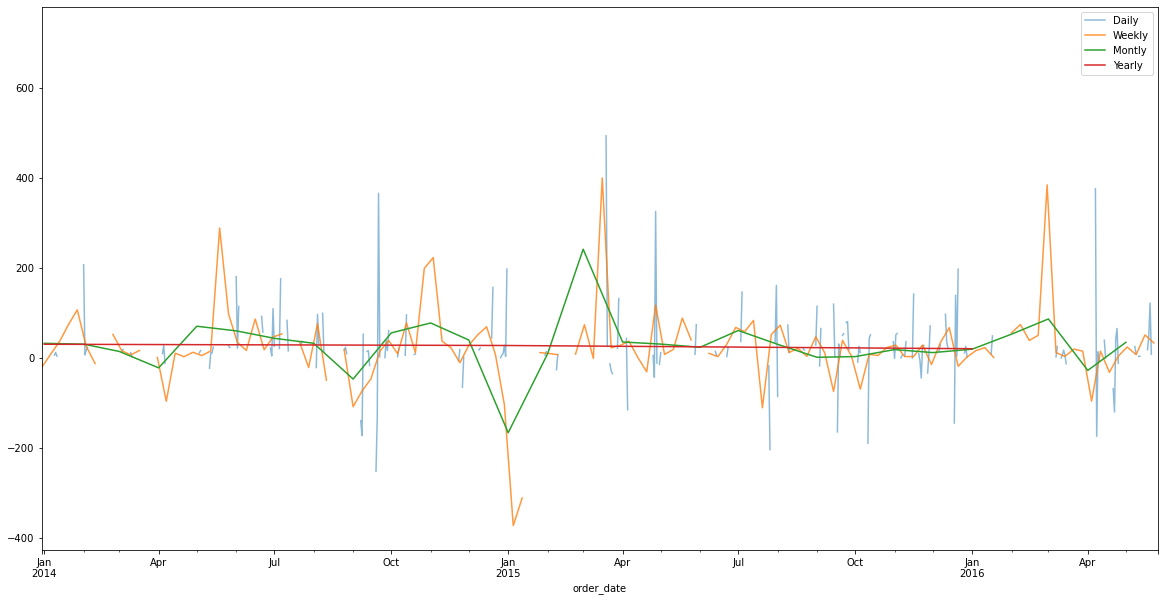

In [24]:
plt.rcParams["figure.figsize"] = (20,10)
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

[Text(0.5, 1.0, 'Average Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Monthly Sales')]

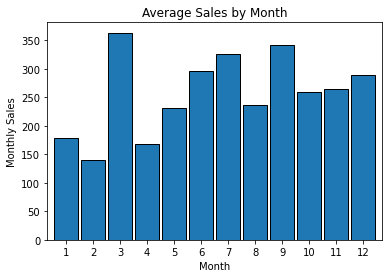

In [9]:
# Addressing the VP's concerns can go many ways, we could focus on the months 
# which have the highest amount of profit to observe which products were most popular
# and then emphasize those, or focus on improving the image of products which are 
# causing us to lose profit, either as a result of discounts or perhaps of contestable
# pricing. 
y2 = train.sales

ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Monthly Sales')

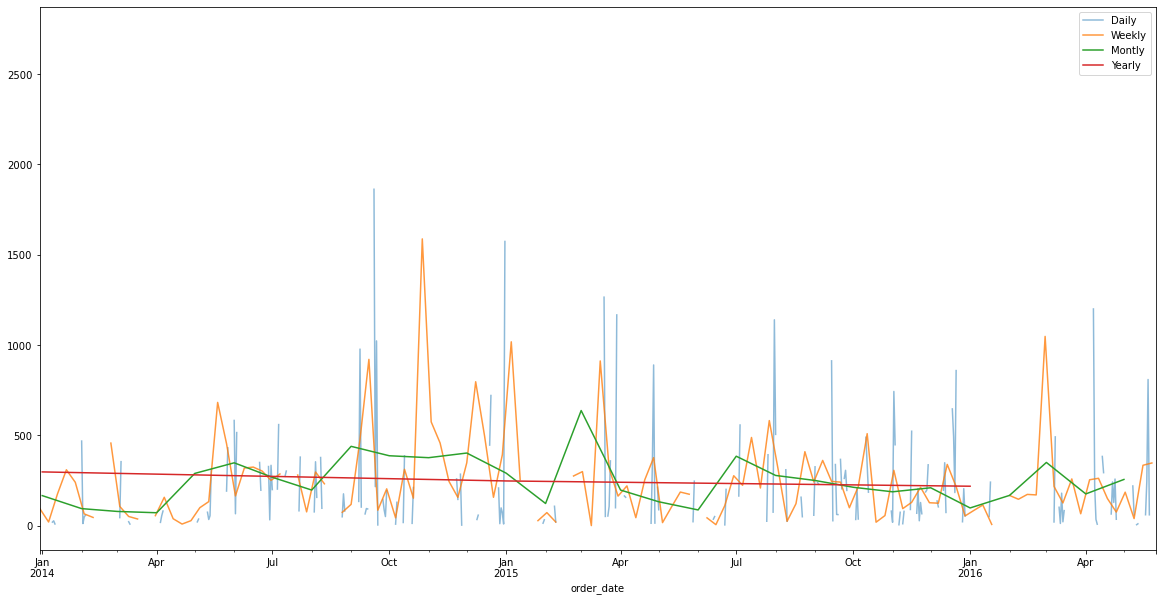

In [23]:
plt.rcParams["figure.figsize"] = (20,10)
y2.resample('D').mean().plot(alpha=.5, label='Daily')
y2.resample('W').mean().plot(alpha=.8, label='Weekly')
y2.resample('M').mean().plot(label='Montly')
y2.resample('Y').mean().plot(label='Yearly')
plt.legend()

[Text(0.5, 1.0, 'Average Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Monthly Sales')]

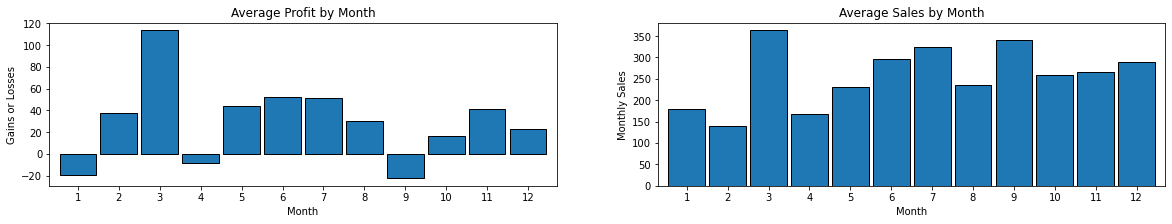

In [10]:
# It'll be easier to see these two side by side. 
plt.rcParams["figure.figsize"] = (20,3)

plt.subplot(1, 2, 1)
y = train.profit

ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Month', xlabel='Month', ylabel='Gains or Losses')

plt.subplot(1, 2, 2)
y2 = train.sales

ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Monthly Sales')

In [5]:
# Sorted profit_per_product in train in descending order
top_profit = train.sort_values(by='profit_per_product', ascending=False, na_position='last')
top_50_profitable_items = top_profit.head(50)
top_50_df = pd.DataFrame(top_50_profitable_items)
top_50_df

,month,year,region_name,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,...,product_name,category,sub_category,days_bw_shipment,quantity,discount,profit,profit_per_product,sales,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2014-11-04,November,2014,East,TEC-MA-10002927,NM-18445,CA-2014-164973,2014-11-09,Standard Class,Home Office,New York City,...,Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,Technology,Machines,5 days,2.0,0.0,1995.9900,997.9950,3991.980,1995.990
2015-03-16,March,2015,South,OFF-BI-10003527,CM-12385,CA-2015-145352,2015-03-22,Standard Class,Consumer,Atlanta,...,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,Binders,6 days,5.0,0.0,3177.4750,635.4950,6354.950,1270.990
2016-03-01,March,2016,East,TEC-MA-10003979,KD-16270,US-2016-143819,2016-03-05,Standard Class,Consumer,Yonkers,...,Ativa V4110MDD Micro-Cut Shredder,Technology,Machines,4 days,7.0,0.0,2400.9657,342.9951,4899.930,699.990
2014-09-21,September,2014,West,TEC-CO-10002313,JG-15115,US-2014-135972,2014-09-23,Second Class,Consumer,Des Moines,...,Canon PC1080F Personal Copier,Technology,Copiers,2 days,3.0,0.0,701.9883,233.9961,1799.970,599.990
2015-08-09,August,2015,East,OFF-BI-10000545,NP-18325,CA-2015-131338,2015-08-12,First Class,Consumer,New York City,...,GBC Ibimaster 500 Manual ProClick Binding System,Office Supplies,Binders,3 days,2.0,0.2,456.5880,228.2940,1217.568,608.784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-29,May,2015,West,OFF-ST-10001496,JL-15850,CA-2015-120880,2015-06-03,Standard Class,Consumer,Seattle,...,Standard Rollaway File with Lock,Office Supplies,Storage,5 days,3.0,0.0,140.5482,46.8494,540.570,180.190
2015-08-09,August,2015,East,TEC-PH-10003012,NP-18325,CA-2015-131338,2015-08-12,First Class,Consumer,New York City,...,Nortel Meridian M3904 Professional Digital phone,Technology,Phones,3 days,2.0,0.0,89.3142,44.6571,307.980,153.990
2015-11-29,November,2015,Central,FUR-CH-10004853,SF-20965,CA-2015-138009,2015-12-03,Standard Class,Corporate,Dearborn,...,"Global Manager's Adjustable Task Chair, Storm",Furniture,Chairs,4 days,2.0,0.0,87.5684,43.7842,301.960,150.980


In [6]:
# Sorted profit_per_product in train in ascending order
least_profit = train.sort_values(by='profit_per_product', ascending=True, na_position='last')
least_50_profitable_items = least_profit.head(50)
least_50_df = pd.DataFrame(least_50_profitable_items)
least_50_df

,month,year,region_name,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,...,product_name,category,sub_category,days_bw_shipment,quantity,discount,profit,profit_per_product,sales,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2016-04-08,April,2016,Central,OFF-BI-10004995,ZC-21910,CA-2016-130946,2016-04-12,Standard Class,Consumer,Houston,...,GBC DocuBind P400 Electric Binding System,Office Supplies,Binders,4 days,4.0,0.8,-1850.9464,-462.7366,1088.792,272.198
2015-09-17,September,2015,East,FUR-BO-10004834,TB-21520,US-2015-150630,2015-09-21,Standard Class,Consumer,Philadelphia,...,"Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish",Furniture,Bookcases,4 days,7.0,0.5,-1665.0522,-237.8646,3083.430,440.490
2014-09-19,September,2014,Central,TEC-MA-10000822,SB-20290,US-2014-106992,2014-09-21,Second Class,Corporate,Houston,...,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,2 days,3.0,0.4,-509.9970,-169.9990,3059.982,1019.994
2014-09-08,September,2014,Central,TEC-MA-10000822,BM-11140,CA-2014-139892,2014-09-12,Standard Class,Consumer,San Antonio,...,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,4 days,8.0,0.4,-1359.9920,-169.9990,8159.952,1019.994
2015-09-03,September,2015,East,OFF-SU-10002881,MG-18145,US-2015-138303,2015-09-07,Standard Class,Consumer,Philadelphia,...,Martin Yale Chadless Opener Electric Letter Opener,Office Supplies,Supplies,4 days,1.0,0.2,-149.9058,-149.9058,666.248,666.248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-08,September,2014,Central,OFF-BI-10001071,LH-17020,US-2014-115987,2014-09-13,Second Class,Consumer,Tyler,...,GBC ProClick Punch Binding System,Office Supplies,Binders,5 days,4.0,0.8,-79.3352,-19.8338,51.184,12.796
2014-09-08,September,2014,Central,OFF-ST-10000991,BM-11140,CA-2014-139892,2014-09-12,Standard Class,Consumer,San Antonio,...,Space Solutions HD Industrial Steel Shelving.,Office Supplies,Storage,4 days,3.0,0.2,-58.6347,-19.5449,275.928,91.976
2015-04-26,April,2015,South,OFF-ST-10004123,JE-15745,US-2015-134026,2015-05-02,Standard Class,Consumer,Memphis,...,Safco Industrial Wire Shelving System,Office Supplies,Storage,6 days,1.0,0.2,-18.1960,-18.1960,72.784,72.784


In [ ]:
# The superstores greatest profits and worst losses are in technology and office supplies. 